In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/KhalPrawira/Machine-Learning-Course/refs/heads/main/05.%20Week%205/Dataset/netflix_titles.csv"
df = pd.read_csv(url)

# Display basic info
print("Dataset shape:", df.shape)
print("\nData types and missing values:\n")
print(df.info())
print(df.head())

Dataset shape: (8807, 12)

Data types and missing values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2 

In [3]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)
df['num_cast'] = df['cast'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df[df['release_year'].notnull() & df['date_added'].notnull()]
df['year_added'] = df['date_added'].dt.year.astype(int)
df['release_year'] = df['release_year'].astype(int)
df['release_vs_add_year'] = df['year_added'] - df['release_year']
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

<ipython-input-4-6a604421a090>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].dt.year.astype(int)
<ipython-input-4-6a604421a090>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_year'].astype(int)
<ipython-input-4-6a604421a090>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

<ipython-input-5-f08623d38af3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette=['blue','cyan'])


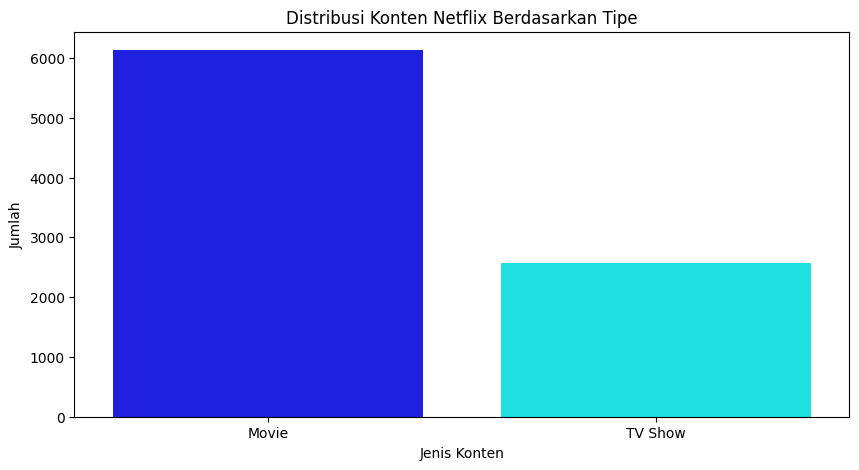

In [5]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(x='type', data=df, palette=['blue','cyan'])
plt.title('Distribusi Konten Netflix Berdasarkan Tipe')
plt.xlabel('Jenis Konten')
plt.ylabel('Jumlah')
plt.show()

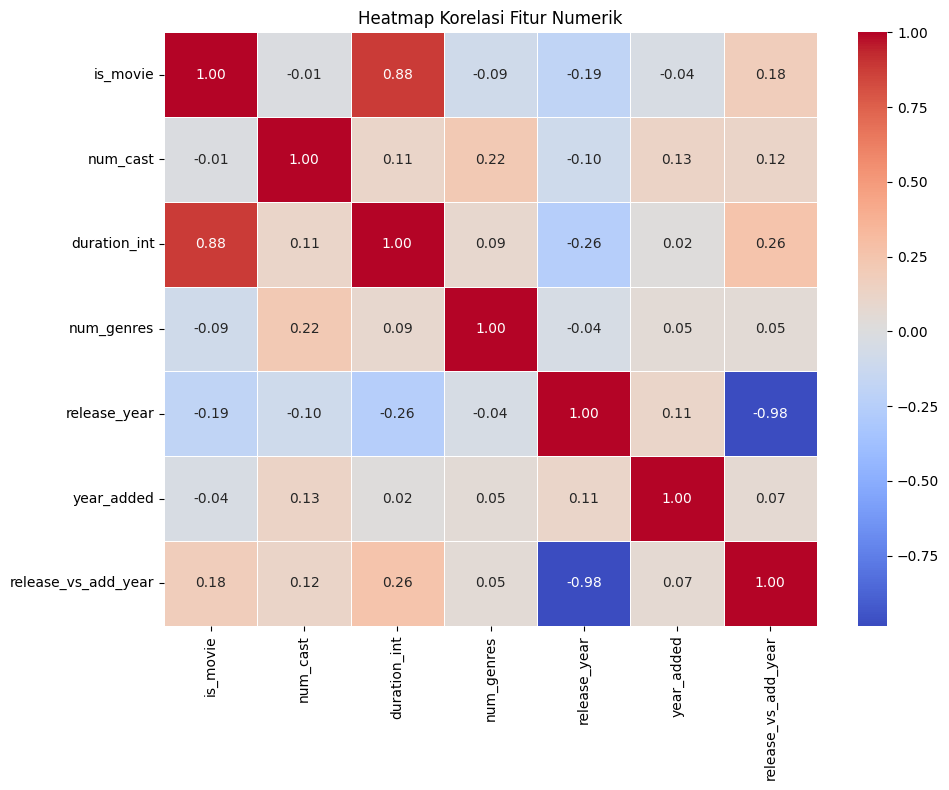

In [6]:
numerical_features = ['is_movie', 'num_cast', 'duration_int', 'num_genres', 'release_year', 'year_added', 'release_vs_add_year']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

<ipython-input-7-aa358980b8e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='duration_type', y='duration_int', palette='Set3')


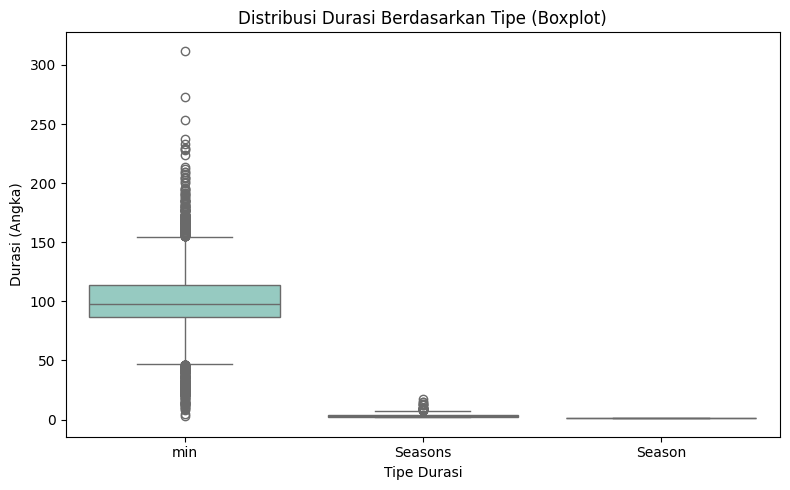

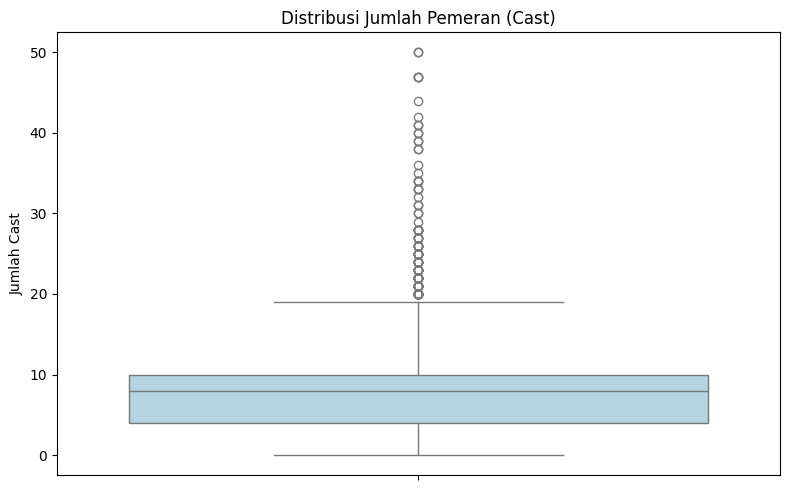

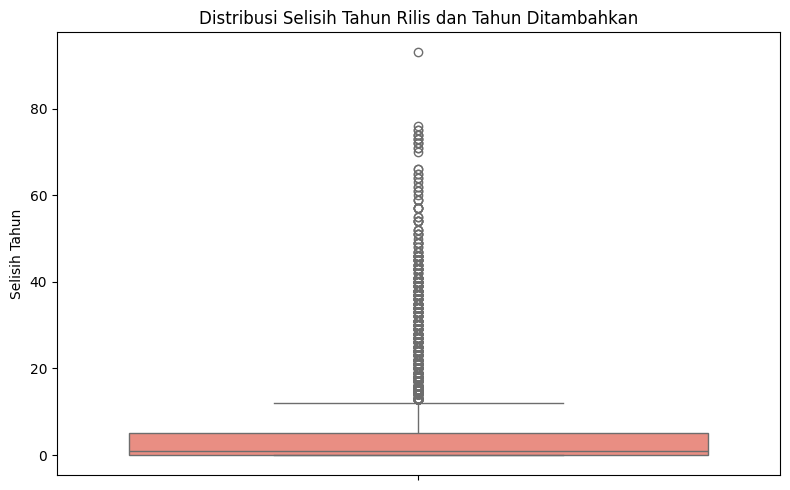

release_vs_add_year
-3        1
-2        1
-1       12
 0     3222
 1     1559
       ... 
 73       3
 74       3
 75       2
 76       1
 93       1
Name: count, Length: 75, dtype: int64


In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='duration_type', y='duration_int', palette='Set3')
plt.title('Distribusi Durasi Berdasarkan Tipe (Boxplot)')
plt.xlabel('Tipe Durasi')
plt.ylabel('Durasi (Angka)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['num_cast'], color='lightblue')
plt.title('Distribusi Jumlah Pemeran (Cast)')
plt.ylabel('Jumlah Cast')
plt.tight_layout()
plt.show()

filtered = df[(df['release_vs_add_year'] >= 0) & (df['release_vs_add_year'] < 100)]
plt.figure(figsize=(8, 5))
sns.boxplot(y=filtered['release_vs_add_year'], color='salmon')
plt.title('Distribusi Selisih Tahun Rilis dan Tahun Ditambahkan')
plt.ylabel('Selisih Tahun')
plt.tight_layout()
plt.show()

print(df['release_vs_add_year'].value_counts().sort_index())

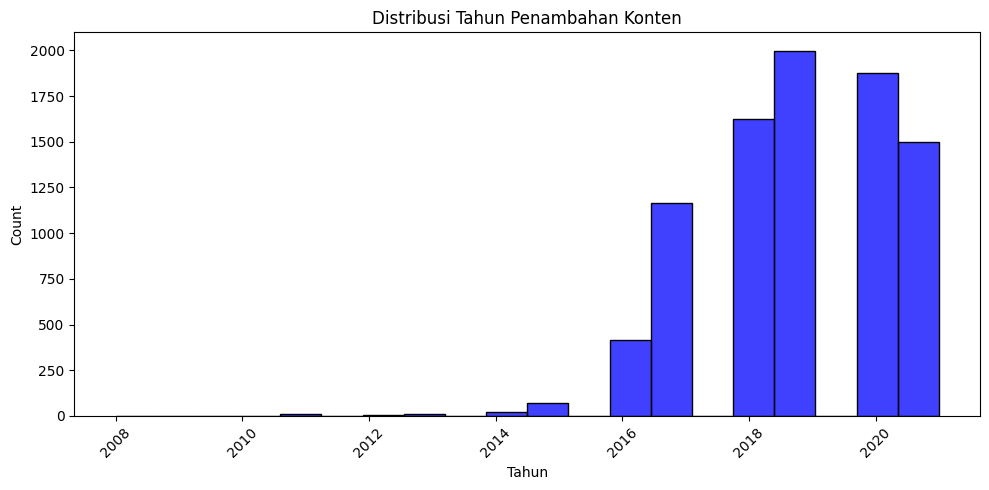

<ipython-input-8-92be3e37cf5d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rating_count.index, y=top_rating_count.values, palette='plasma')


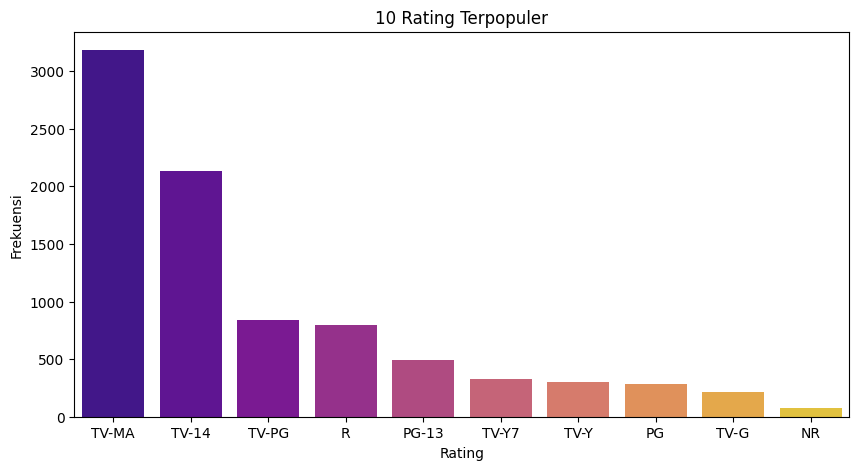

<ipython-input-8-92be3e37cf5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country.index, y=top_country.values, palette='viridis')


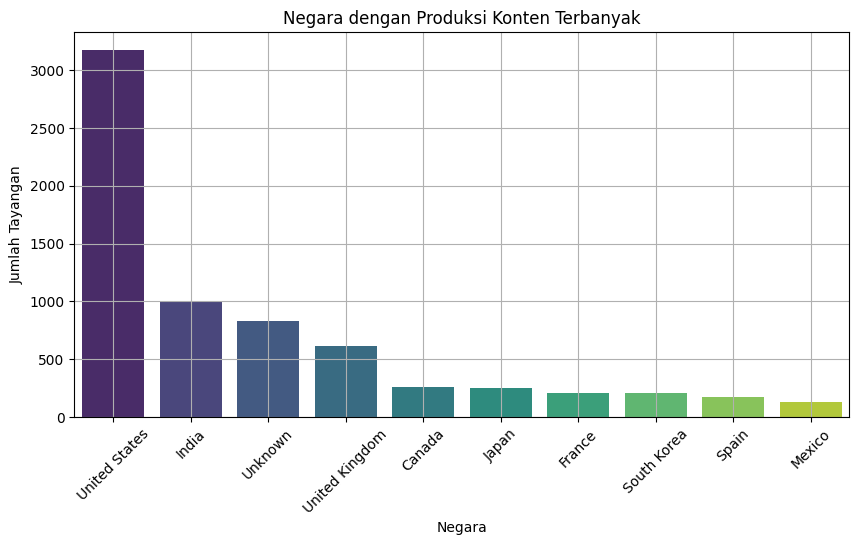

In [8]:
sns.histplot(data=df[df['year_added'] > 0], x='year_added', bins=20, color='blue')
plt.title('Distribusi Tahun Penambahan Konten')
plt.xlabel('Tahun')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_rating_count = df['rating'].value_counts().nlargest(10)
sns.barplot(x=top_rating_count.index, y=top_rating_count.values, palette='plasma')
plt.title('10 Rating Terpopuler')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

if 'country' in df.columns:
    df['main_country'] = df['country'].fillna('Unknown').apply(lambda x: x.split(',')[0].strip())
top_country = df['main_country'].value_counts().head(10)
sns.barplot(x=top_country.index, y=top_country.values, palette='viridis')
plt.title('Negara dengan Produksi Konten Terbanyak')
plt.xlabel('Negara')
plt.ylabel('Jumlah Tayangan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
df['is_movie'] = df['type'].map(lambda x: 1 if x == 'Movie' else 0)
df['num_cast'] = df['cast'].map(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
df['duration_int'] = df['duration'].str.extract('(\d+)').astype('float')
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')
df['release_vs_add_year'] = df['year_added'] - df['release_year']

df[['title', 'type', 'is_movie', 'num_cast', 'duration_int', 'duration_type', 'num_genres', 'release_vs_add_year']].head()

,title,type,is_movie,num_cast,duration_int,duration_type,num_genres,release_vs_add_year
0,Dick Johnson Is Dead,Movie,1,0,90.0,min,1,1
1,Blood & Water,TV Show,0,19,2.0,Seasons,3,0
2,Ganglands,TV Show,0,9,1.0,Season,3,0
3,Jailbirds New Orleans,TV Show,0,0,1.0,Season,2,0
4,Kota Factory,TV Show,0,8,2.0,Seasons,3,0


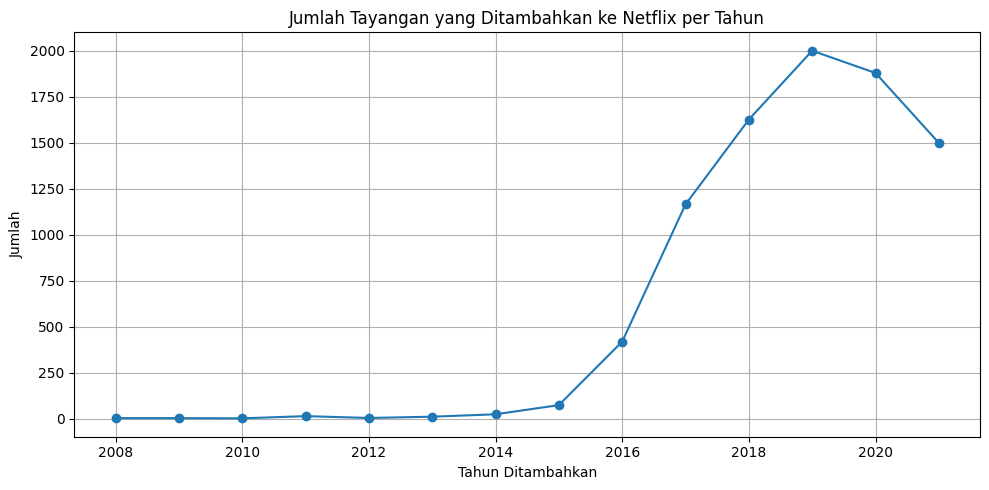

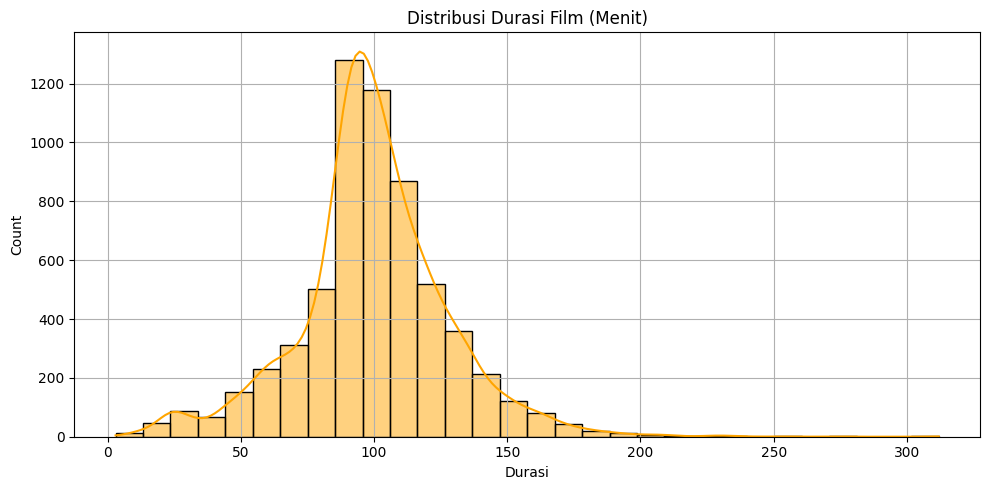

<ipython-input-10-387b8297dc07>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=tv_df['duration_int'], palette='Purples')


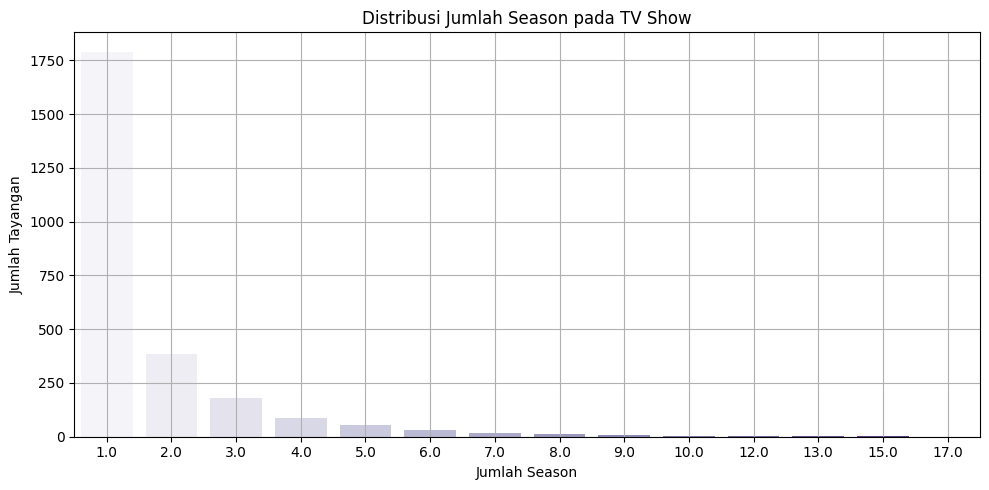

In [10]:
df['has_director'] = df['director'].notnull().astype(int)

df['month_added'] = df['date_added'].dt.month

plt.figure()
df['year_added'].value_counts().sort_index().plot(marker='o')
plt.title("Jumlah Tayangan yang Ditambahkan ke Netflix per Tahun")
plt.xlabel("Tahun Ditambahkan")
plt.ylabel("Jumlah")
plt.grid(True)
plt.tight_layout()
plt.show()

movie_df = df[df['type'] == 'Movie']
plt.figure()
sns.histplot(movie_df['duration_int'].dropna(), bins=30, kde=True, color='orange')
plt.title("Distribusi Durasi Film (Menit)")
plt.xlabel("Durasi")
plt.grid(True)
plt.tight_layout()
plt.show()

tv_df = df[df['type'] == 'TV Show']
plt.figure()
sns.countplot(x=tv_df['duration_int'], palette='Purples')
plt.title("Distribusi Jumlah Season pada TV Show")
plt.xlabel("Jumlah Season")
plt.ylabel("Jumlah Tayangan")
plt.grid(True)
plt.tight_layout()
plt.show()

- **Nilai Rata-Rata (Mean)**:  
  $$
  \mu = \frac{1}{n} \sum_{i=1}^{n} x_i
  $$  
  Di mana $x_i$ merupakan tahun rilis ke-$i$, dan $n$ adalah total jumlah tayangan dalam dataset.

- **Simpangan Baku (Standard Deviation)**:  
  $$
  \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
  $$  
  Rumus ini digunakan untuk mengetahui sejauh mana nilai tahun rilis menyebar dari rata-ratanya.

- **Kuartil**:  
  Kuartil diperoleh dengan mengurutkan seluruh data, kemudian menentukan nilai pada posisi 25% (kuartil 1), 50% (median), dan 75% (kuartil 3) dari jumlah data secara keseluruhan.
